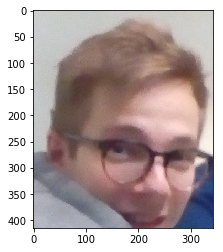

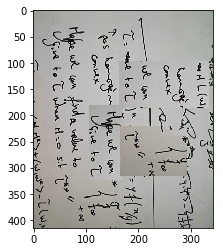

In [217]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img1=mpimg.imread('C:/Users/Pierre Lavigne/Dropbox/Etude de Cas M2/lowpixel.jpg')
img2=mpimg.imread('C:/Users/Pierre Lavigne/Dropbox/Etude de Cas M2/tagbase.jpg')
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

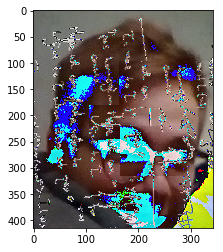

In [190]:
plt.imshow(img1+img2)
plt.show()

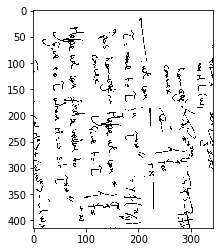

In [191]:
def scriptmat(img):
    imge = img
    m,p = imge.shape[0:2]
    for i in range(m):
        for j in range(p):
            if sum(imge[i][j])/3 > 70:
                imge[i][j] = [255,255,255]
            else:
                imge[i][j] = [0,0,0]
    return imge

scriptmat = scriptmat(img2)
plt.imshow(scriptmat)
plt.show()

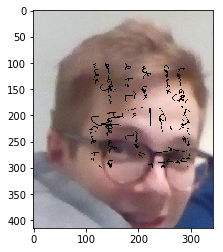

In [220]:
def noise(img,scriptmat,x,y):
    m,p = img.shape[0:2]
    noisyimg = img
    for i in range(m):
        for j in range(p):
            if ((min(i,j)>x and max(i,j)<y)and sum(scriptmat[i][j])<100):
                noisyimg[i][j]= scriptmat[i][j]
            else:
                pass
    return noisyimg


plt.imshow(noise(img1,scriptmat,100,300))
plt.show()

Test on signs:

In [206]:
import matplotlib.pyplot as plt
import csv

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return(images, labels)

In [210]:
path="C:/Users/Pierre Lavigne/Desktop/GTSRB/Final_Training/Images/"
trainImages, trainLabels = readTrafficSigns(path)

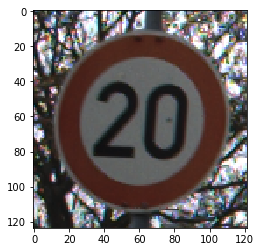

In [211]:
plt.imshow(trainImages[89])
plt.show()

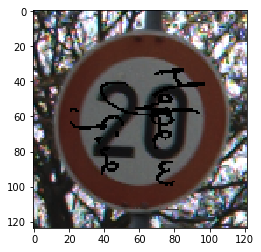

In [213]:
plt.imshow(noise(trainImages[89],scriptmat,20,100))
plt.show()

In [307]:
sqr=mpimg.imread('C:/Users/Pierre Lavigne/Dropbox/Etude de Cas M2/white_square.jpg')
sqr[0][:10].shape

(10, 3)

In [222]:
plt.imshow(trainImages[89]+sqr)
plt.show()

ValueError: operands could not be broadcast together with shapes (124,122,3) (152,164,3) 